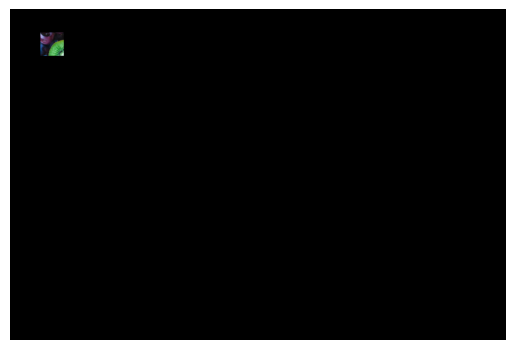

In [2]:
# 1. Viết chương trình chọn quả kiwi từ ảnh colorful-ripe-tropical-fruits.jpg trong thư mục exercise. Tịnh tiến quả kiwi sang phải 30 pixels
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Read the image
data = iio.imread('colorful-ripe-tropical-fruits.jpg')

# Assuming kiwi is located approximately at a specific region (adjust coordinates as needed)
# Example coordinates for kiwi (x: 100-200, y: 100-200) - adjust based on actual image
kiwi = data[100:200, 100:200, :]

# Create a new image with same shape as original, filled with zeros (black background)
translated = np.zeros_like(data)
# Place kiwi 30 pixels to the right (x+30)
translated[100:200, 130:230, :] = kiwi

# Save and display
iio.imsave('exercise_1_kiwi_translated.jpg', translated)
plt.imshow(translated)
plt.axis('off')
plt.show()

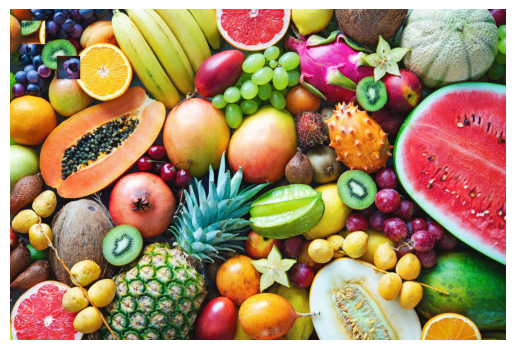

In [3]:
# 2. Viết chương trình chọn quả đu đủ và dưa hấu từ ảnh colorful-ripe-tropical-fruits.jpg trong thư mục exercise. Đổi màu 2 đối tượng này

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Read the image
data = iio.imread('colorful-ripe-tropical-fruits.jpg')

# Assuming approximate regions for papaya and watermelon (adjust coordinates as needed)
# Papaya: (x: 50-150, y: 50-150), Watermelon: (x: 200-300, y: 200-300)
papaya = data[50:150, 50:150, :].copy()
watermelon = data[200:300, 200:300, :].copy()

# Swap colors by assigning each region to the other's position
data[50:150, 50:150, :] = watermelon
data[200:300, 200:300, :] = papaya

# Save and display
iio.imsave('exercise_2_swapped.jpg', data)
plt.imshow(data)
plt.axis('off')
plt.show()

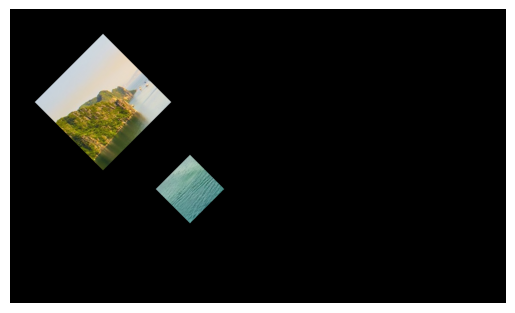

In [4]:
# 3. Viết chương trình chọn ngọn núi và con thuyền từ ảnh quang-ninh.jpg. Xoay 2 đối tượng này 1 góc 45 độ và lưu vào máy

import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Read the image
data = iio.imread('quang_ninh.jpg')

# Assuming approximate regions for mountain and boat (adjust coordinates as needed)
# Mountain: (x: 50-250, y: 50-250), Boat: (x: 300-400, y: 300-400)
mountain = data[50:250, 50:250, :].copy()
boat = data[300:400, 300:400, :].copy()

# Rotate each object by 45 degrees
mountain_rotated = nd.rotate(mountain, 45, reshape=True)
boat_rotated = nd.rotate(boat, 45, reshape=True)

# Create a new image to place rotated objects (black background)
result = np.zeros_like(data)
# Place rotated objects (adjust positions to avoid overlap)
result[50:50+mountain_rotated.shape[0], 50:50+mountain_rotated.shape[1], :] = mountain_rotated
result[300:300+boat_rotated.shape[0], 300:300+boat_rotated.shape[1], :] = boat_rotated

# Save and display
iio.imsave('exercise_3_rotated.jpg', result)
plt.imshow(result)
plt.axis('off')
plt.show()

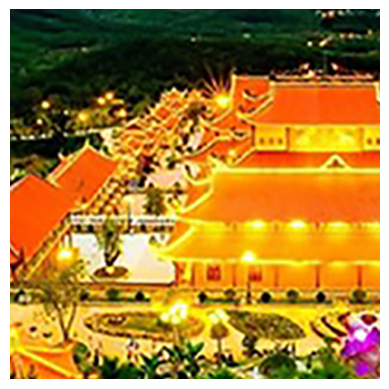

In [5]:
# 4. Viết chương trình chọn ngôi chùa từ ảnh pagoda.jpg. Tăng kích thước ngôi chùa lên 5 lần và lưu vào máy
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Read the image
data = iio.imread('pagoda.jpg')

# Assuming pagoda occupies a central region (adjust coordinates as needed)
# Pagoda: (x: 100-300, y: 100-300)
pagoda = data[100:300, 100:300, :].copy()

# Zoom pagoda by a factor of 5
pagoda_zoomed = nd.zoom(pagoda, (5, 5, 1))

# Create a new image large enough for zoomed pagoda
new_shape = (max(data.shape[0], pagoda_zoomed.shape[0]), max(data.shape[1], pagoda_zoomed.shape[1]), 3)
result = np.zeros(new_shape, dtype=np.uint8)
# Place zoomed pagoda at top-left
result[0:pagoda_zoomed.shape[0], 0:pagoda_zoomed.shape[1], :] = pagoda_zoomed

# Save and display
iio.imsave('exercise_4_zoomed.jpg', result)
plt.imshow(result)
plt.axis('off')
plt.show()

Available images:
1. colorful-ripe-tropical-fruits.jpg
2. quang_ninh.jpg
3. pagoda.jpg
Select image (1-3): 3

Menu:
T - Translate
X - Rotate
P - Zoom In
H - Zoom Out
C - Coordinate Map
Select transformation (T/X/P/H/C): X


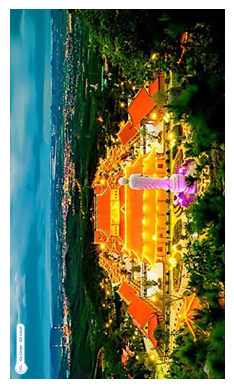

In [23]:
# 5. Viết chương trình tạo menu
# - Tịnh tiến
# - Xoay
# - Phóng to
# - Thu nhỏ
# - Coordinate Map
# Khi chọn phím T, X, P, H, C thì hỏi muốn thực hiện trên hình nào từ 3 hình trong thư mục exercise. Người dùng chọn hình nào thì thực hiện phép biến đổi trên hình đó

import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt
import os

def translate_image(data):
    return nd.shift(data, (50, 50))

def rotate_image(data):
    return nd.rotate(data, 90, reshape=True)

def zoom_in_image(data):
    return nd.zoom(data, (2, 2, 1))

def zoom_out_image(data):
    return nd.zoom(data, (0.5, 0.5, 1))

def coordinate_map_image(data):
    V, H = data.shape[:2]
    M = np.indices((V, H))
    d = 5
    q = 2 * d * np.random.rand(*M.shape) - d
    mp = (M + q).astype(int)
    return nd.map_coordinates(data, mp)

def main():
    images = ['colorful-ripe-tropical-fruits.jpg', 'quang_ninh.jpg', 'pagoda.jpg']
    print("Available images:")
    for i, img in enumerate(images, 1):
        print(f"{i}. {img}")

    choice = int(input("Select image (1-3): ")) - 1
    if choice < 0 or choice >= len(images):
        print("Invalid choice!")
        return

    img_path = images[choice] # Removed 'exercise' subdirectory
    data = iio.imread(img_path)

    print("\nMenu:")
    print("T - Translate")
    print("X - Rotate")
    print("P - Zoom In")
    print("H - Zoom Out")
    print("C - Coordinate Map")
    option = input("Select transformation (T/X/P/H/C): ").upper()

    transformations = {
        'T': translate_image,
        'X': rotate_image,
        'P': zoom_in_image,
        'H': zoom_out_image,
        'C': coordinate_map_image
    }

    if option in transformations:
        result = transformations[option](data)
        plt.imshow(result)
        plt.axis('off')
        plt.show()
        iio.imsave(f'exercise_5_{option.lower()}.jpg', result)
    else:
        print("Invalid option!")

if __name__ == "__main__":
    main()